In [1]:
import time
import datetime

import numpy as np
import pandas as pd

import keras
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from common import *

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['grid.color'] = (.7, .7, .7, 0)
plt.rcParams['figure.figsize'] = (16, 10)

Using TensorFlow backend.


In [2]:
data = prep_data('../data/4A_1_201701_201708.csv')
print(len(data))

1769626


In [3]:
data = data[(1 <= data['LineDirectionLinkOrder']) & (data['LineDirectionLinkOrder'] <= 30)]
assert len(data['LinkRef'].unique()) == 30
n = len(data)
print(n)

1288980


In [4]:
data_train = data[:int(.95 * n)]
data_test = data[int(.95 * n):]
n_train = len(data_train)
n_test = len(data_test)
print(n_train, n_test)

(1224531, 64449)


In [37]:
(means, scales, low, upr) = fit_scale(data_train, smooth = 1)
assert means.shape[0] == 4 * 24 * 7
#assert len(scales) == 30
#assert len(low) == 30
#assert len(upr) == 30
(means.shape, len(scales), len(low), len(upr))

((672, 30), 30, 30, 30)

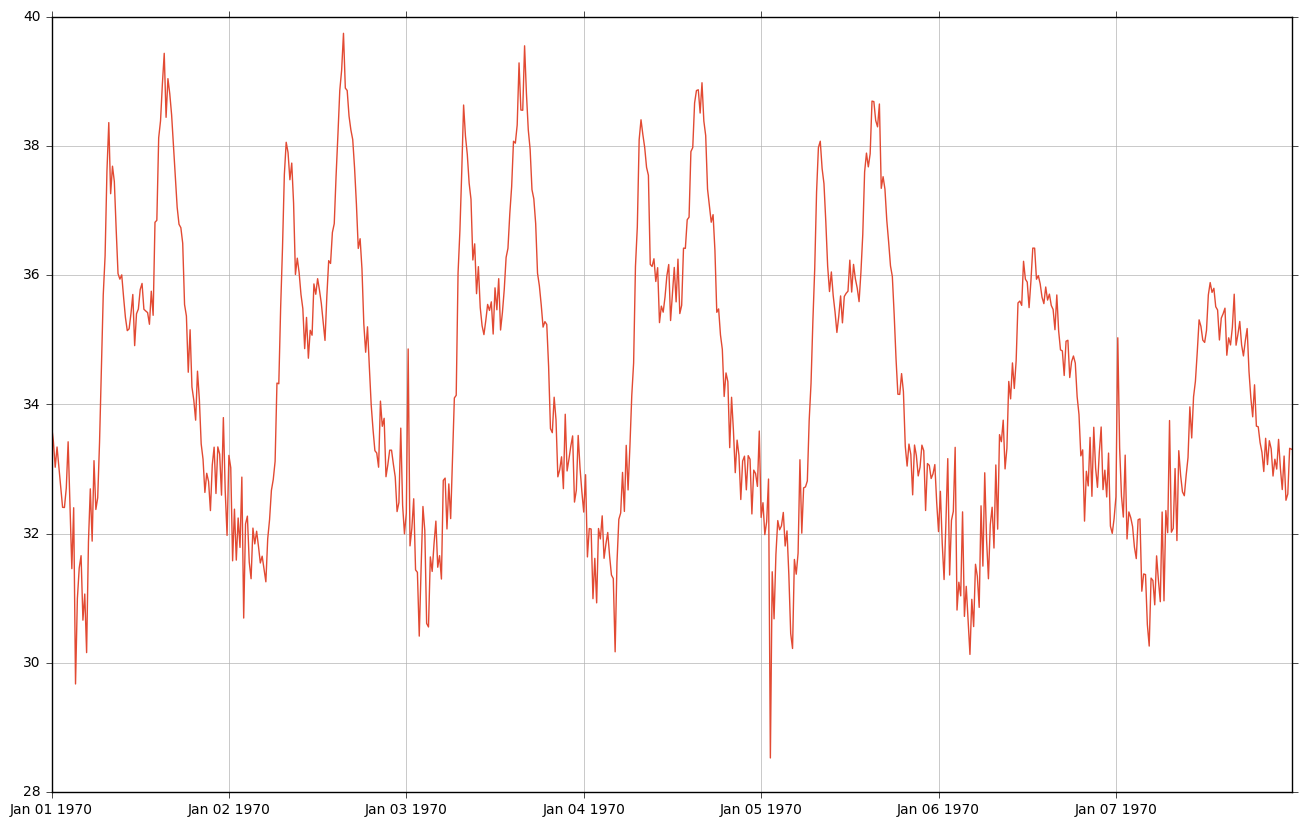

In [38]:
plt.plot(means.sum(axis = 1) / 60)

In [39]:
data_train_no, n = remove_outliers(data_train, low, upr)
print('Removed {0} outliers ({1:.3f}%)'.format(n, 1.0 * n / len(data_train)))

Removed 158737 outliers (0.130%)


In [40]:
ix, ts, removed_mean, removed_scale, w, ks = transform(data_train_no, means, scales, low, upr)

In [41]:
(w * ts).mean(axis = 0).sum()

-0.0016642205170255436

In [42]:
data_test_no, n = remove_outliers(data_test, low, upr)
print('Removed {0} outliers ({1:.3f}%)'.format(n, 1.0 * n / len(data_test)))

Removed 9238 outliers (0.143%)


In [43]:
ix, ts, removed_mean, removed_scale, w, ks = transform(data_test_no, means, scales, low, upr)

In [44]:
(w * ts).mean(axis = 0).sum()

84.414900389411784